Generating wiki103 image followign the work found here -> https://dax-cdn.cdn.appdomain.cloud/dax-wikitext-103/1.0.1/data-preview/WikiText_103_Notebook.html 

In [1]:
from IPython.display import clear_output

# Download & load required python packages
!pip install wordcloud

import hashlib
import re
import sys
import tarfile
from collections import Counter, defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import requests
from IPython.display import Image

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
nltk.download('all')

clear_output() 

In [2]:
# Download the dataset
fname = 'wikitext-103.tar.gz'
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-wikitext-103/1.0.1/' + fname
r = requests.get(url)
Path(fname).write_bytes(r.content)

189603606

In [3]:
# Verify the file was downloaded properly by comparing sha512 checksums
sha512sum = 'c8186919aa1840af6b734ea41abc580574ea8efe2fafda220f5d01002464d17566d84be5199b875136c9593f0e0678fb5d7c84bb2231de8b4151cb9c83fa2109'
sha512sum_computed = hashlib.sha512(Path('wikitext-103.tar.gz').read_bytes()).hexdigest()
sha512sum == sha512sum_computed

True

In [4]:
# Extract the dataset
with tarfile.open(fname) as tar:
    tar.extractall()

In [5]:
# Read train, val, and test sets into string objects
train_data = Path('wikitext-103/wiki.train.tokens').read_text()
val_data = Path('wikitext-103/wiki.valid.tokens').read_text()
test_data = Path('wikitext-103/wiki.test.tokens').read_text()

In [6]:
heading_pattern = '( \n \n = [^=]*[^=] = \n \n )'

In [7]:
# Split out train headings and articles
train_split = re.split(heading_pattern, train_data)
train_headings = [x[7:-7] for x in train_split[1::2]]
train_articles = [x for x in train_split[2::2]]

In [9]:
# Split out validation headings and articles
val_split = re.split(heading_pattern, val_data)
val_headings = [x[7:-7] for x in val_split[1::2]]
val_articles = [x for x in val_split[2::2]]

In [10]:
# Split out test headings and articles
test_split = re.split(heading_pattern, test_data)
test_headings = [x[7:-7] for x in test_split[1::2]]
test_articles = [x for x in test_split[2::2]]

In [11]:
# Number of Wikipedia articles in our training data
len(train_headings)

28470

In [12]:
# Example article
print('Heading: ', train_headings[110])
print('Article sample: ', train_articles[110][:118])

Heading:  Sandwich Day
Article sample:  " Sandwich Day " is the fourteenth episode of the second season of 30 Rock and the thirty @-@ fifth episode overall . 


In [14]:
# Remove casing, punctuation, special characters, and stop words and also lemmatize the words on a subset of the first 110 articles in the train data
my_new_text = re.sub('[^ a-zA-Z0-9]|unk', '', train_data[:2010011])
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(my_new_text.lower())
filtered_sentence = (w for w in word_tokens if w not in stop_words)
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

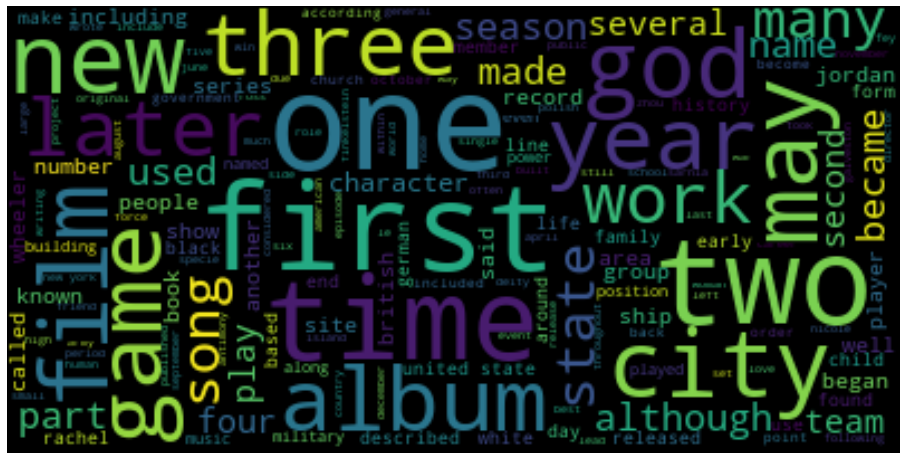

In [15]:
# Now we can create a word cloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()